In [641]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [642]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape', train.shape)
print('test shape', test.shape)

train shape (891, 12)
test shape (418, 11)


In [643]:
# merge train and test for data cleaning
ship = train.append(test, ignore_index=True)
ship.head(3)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [644]:
# create index to separate test back out later
train_index = len(train)
test_index = len(ship) - len(test) + 1
print(train_index)
print(test_index)

891
892


In [645]:
# Review data, fields
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [646]:
# check for NaN data
zz = ship.isnull().sum()
zz[zz > 0]

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

In [647]:
ship.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [648]:
ship.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [649]:
# Fill in missing data

In [650]:
# Embarked: fill NaN with most common Embarked value
ship.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [651]:
type(ship.Embarked.value_counts())
ship.Embarked.value_counts().index[0]

'S'

In [652]:
ship.Embarked = ship.Embarked.fillna(ship.Embarked.value_counts().index[0])

In [653]:
# Fare: going to use age, sex & pclass to estimate even though only 1 missing value

In [654]:
# Age
# use titles in name to approximate age

In [655]:
# create column with titles
ship['title'] = ship.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [656]:
ship.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [657]:
# list titles, and counts by sex to look for patterns
ship.groupby(['title'])['Sex'].value_counts()

title         Sex   
Capt          male        1
Col           male        4
Don           male        1
Dona          female      1
Dr            male        7
              female      1
Jonkheer      male        1
Lady          female      1
Major         male        2
Master        male       61
Miss          female    260
Mlle          female      2
Mme           female      1
Mr            male      757
Mrs           female    197
Ms            female      2
Rev           male        8
Sir           male        1
the Countess  female      1
Name: Sex, dtype: int64

In [658]:
# median age by titles & Pclass to look for patterns
ship.groupby(['title', 'Pclass'])['Age'].median()

title         Pclass
Capt          1         70.0
Col           1         54.5
Don           1         40.0
Dona          1         39.0
Dr            1         49.0
              2         38.5
Jonkheer      1         38.0
Lady          1         48.0
Major         1         48.5
Master        1          6.0
              2          2.0
              3          6.0
Miss          1         30.0
              2         20.0
              3         18.0
Mlle          1         24.0
Mme           1         24.0
Mr            1         41.5
              2         30.0
              3         26.0
Mrs           1         45.0
              2         30.5
              3         31.0
Ms            2         28.0
              3          NaN
Rev           2         41.5
Sir           1         49.0
the Countess  1         33.0
Name: Age, dtype: float64

In [659]:
ship.pivot_table(values = 'Survived', 
                  index = 'Age', 
                  columns = 'Pclass', 
                  aggfunc = ['count', 'mean'])

count                 mean                    
Pclass     1    2     3         1         2         3
Age                                                  
0.17     NaN  NaN   0.0       NaN       NaN       NaN
0.33     NaN  NaN   0.0       NaN       NaN       NaN
0.42     NaN  NaN   1.0       NaN       NaN  1.000000
0.67     NaN  1.0   NaN       NaN  1.000000       NaN
0.75     NaN  NaN   2.0       NaN       NaN  1.000000
0.83     NaN  2.0   0.0       NaN  1.000000       NaN
0.92     1.0  0.0   NaN  1.000000       NaN       NaN
1.00     NaN  2.0   5.0       NaN  1.000000  0.600000
2.00     1.0  2.0   7.0  0.000000  1.000000  0.142857
3.00     NaN  3.0   3.0       NaN  1.000000  0.666667
4.00     1.0  2.0   7.0  1.000000  1.000000  0.571429
5.00     NaN  1.0   3.0       NaN  1.000000  1.000000
6.00     0.0  1.0   2.0       NaN  1.000000  0.500000
7.00     NaN  1.0   2.0       NaN  1.000000  0.000000
8.00     NaN  2.0   2.0       NaN  1.000000  0.000000
9.00     NaN  NaN   8.0       NaN       NaN  0.250000
10.00    NaN  NaN   2.0       NaN       NaN  0.000000
11.00    1.0  NaN   3.0  1.000000       NaN  0.000000
11.50    NaN  NaN   0.0       NaN       NaN       NaN
12.00    NaN  0.0   1.0       NaN       NaN  1.000000
13.00    0.0  1.0   1.0       NaN  1.000000  1.000000
14.00    1.0  1.0   4.0  1.000000  1.000000  0.250000
14.50    NaN  NaN   1.0       NaN       NaN  0.000000
15.00    1.0  0.0   4.0  1.000000       NaN  0.750000
16.00    3.0  2.0  12.0  1.000000  0.000000  0.250000
17.00    3.0  2.0   8.0  1.000000  1.000000  0.125000
18.00    4.0  6.0  16.0  0.750000  0.333333  0.250000
18.50    NaN  0.0   0.0       NaN       NaN       NaN
19.00    5.0  6.0  14.0  0.600000  0.500000  0.214286
20.00    NaN  0.0  15.0       NaN       NaN  0.200000
...      ...  ...   ...       ...       ...       ...
46.00    2.0  1.0   NaN  0.000000  0.000000       NaN
47.00    5.0  1.0   3.0  0.200000  0.000000  0.000000
48.00    5.0  2.0   2.0  1.000000  0.500000  0.000000
49.00    5.0  0.0   1.0  0.800000       NaN  0.000000
50.00    5.0  4.0   1.0  0.400000  0.750000  0.000000
51.00    3.0  1.0   3.0  0.666667  0.000000  0.000000
52.00    4.0  2.0   NaN  0.750000  0.000000       NaN
53.00    1.0  NaN   NaN  1.000000       NaN       NaN
54.00    4.0  4.0   NaN  0.500000  0.250000       NaN
55.00    1.0  1.0   NaN  0.000000  1.000000       NaN
55.50    NaN  NaN   1.0       NaN       NaN  0.000000
56.00    4.0  NaN   NaN  0.500000       NaN       NaN
57.00    0.0  2.0   NaN       NaN  0.000000       NaN
58.00    5.0  NaN   NaN  0.600000       NaN       NaN
59.00    0.0  1.0   1.0       NaN  0.000000  0.000000
60.00    3.0  1.0   NaN  0.666667  0.000000       NaN
60.50    NaN  NaN   0.0       NaN       NaN       NaN
61.00    2.0  0.0   1.0  0.000000       NaN  0.000000
62.00    3.0  1.0   NaN  0.333333  1.000000       NaN
63.00    1.0  0.0   1.0  1.000000       NaN  1.000000
64.00    2.0  NaN   NaN  0.000000       NaN       NaN
65.00    2.0  NaN   1.0  0.000000       NaN  0.000000
66.00    NaN  1.0   NaN       NaN  0.000000       NaN
67.00    0.0  NaN   NaN       NaN       NaN       NaN
70.00    1.0  1.0   NaN  0.000000  0.000000       NaN
70.50    NaN  NaN   1.0       NaN       NaN  0.000000
71.00    2.0  NaN   NaN  0.000000       NaN       NaN
74.00    NaN  NaN   1.0       NaN       NaN  0.000000
76.00    0.0  NaN   NaN       NaN       NaN       NaN
80.00    1.0  NaN   NaN  1.000000       NaN       NaN

[98 rows x 6 columns]

In [660]:
grouped_title_Pclass = ship.groupby(['title', 'Pclass'])

grouped = ship.groupby(['title', 'Pclass'])['Age'].median()
grouped

title         Pclass
Capt          1         70.0
Col           1         54.5
Don           1         40.0
Dona          1         39.0
Dr            1         49.0
              2         38.5
Jonkheer      1         38.0
Lady          1         48.0
Major         1         48.5
Master        1          6.0
              2          2.0
              3          6.0
Miss          1         30.0
              2         20.0
              3         18.0
Mlle          1         24.0
Mme           1         24.0
Mr            1         41.5
              2         30.0
              3         26.0
Mrs           1         45.0
              2         30.5
              3         31.0
Ms            2         28.0
              3          NaN
Rev           2         41.5
Sir           1         49.0
the Countess  1         33.0
Name: Age, dtype: float64

In [661]:
# All Ms title and Pclass 3 passenager age are missing 

In [662]:
grouped_title_Pclass['Age']

In [663]:
# Ages: fill in the missing ages with the median for that title & Pclass
ship['Age'] = round(grouped_title_Pclass['Age'].apply(lambda x : x.fillna(x.median())), 0)


In [664]:
ship.sample(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
1208,19.0,NaN,S,10.5000,"Rogers, Mr. Reginald Harry",0,1209,2,male,0,NaN,28004,Mr
29,26.0,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216,Mr


In [665]:
ship[ship.Age.isnull()] # to check that all NaN is filled

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
979,NaN,NaN,Q,7.75,"O'Donoghue, Ms. Bridget",0,980,3,female,0,NaN,364856,Ms


In [666]:
grouped_Pclass_Age = ship.groupby(['Pclass'])['Age'].median()
grouped_Pclass_Age
# ship.groupby(['Pclass'])['Age'].median()[3]
# ship.groupby(['Pclass'])['Age'].median().index[0]

Pclass
1    42.0
2    29.0
3    26.0
Name: Age, dtype: float64

In [667]:
ship.groupby(['title'])['Age'].median()
# print('index[0]', ship.groupby(['title'])['Age'].median().index[0])
# print('[0]', ship.groupby(['title'])['Age'].median()[0])

title
Capt            70.0
Col             54.5
Don             40.0
Dona            39.0
Dr              49.0
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           6.0
Miss            19.0
Mlle            24.0
Mme             24.0
Mr              27.0
Mrs             35.0
Ms              28.0
Rev             41.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [668]:
ship['Age'] = ship['Age'].fillna(grouped_Pclass_Age[3])

In [669]:
ship[ship.Age.isnull()] # to confirm that all age records are filled 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title


In [670]:
missing = ship.isnull().sum() 
missing[missing > 0]

Cabin       1014
Fare           1
Survived     418
dtype: int64

In [671]:
# create some new descriptive variables

In [672]:
# Family Size = passenger plus SibSp plus Parch
ship['Family_size'] = ship.SibSp + ship.Parch + 1

In [673]:
ship.Cabin.head(10)[3][0]

'C'

In [674]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
title          1309 non-null object
Family_size    1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 143.2+ KB


In [675]:
ship.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,Family_size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2


In [676]:
# map first letter of cabin to itself to simplify catergorization
# ship['Cabin'] = ship['Cabin'].apply(lambda x: x[0])
# TypeError: 'float' object is not subscriptable, because there is naN value
ship['Cabin'] = ship['Cabin'].map(lambda x : x[0], na_action = 'ignore')


In [677]:
# convert Sex to interger form
ship['Sex'] = ship.Sex.replace({'male' : 0, 'female': 1})

In [678]:
# ship[['Family_size', 'Survived','Pclass']].groupby(['Family_size']).mean()
ship.groupby(['Family_size'])['Pclass','Survived'].median()

,Pclass,Survived
Family_size,,
1,3,0.0
2,2,1.0
3,2,1.0
4,2,1.0
5,3,0.0
6,3,0.0
7,3,0.0
8,3,0.0
11,3,0.0


In [679]:
# add variables to bucket the family sizes
ship['Fmaily'] = ship['Family_size'].apply(lambda x : 'Single' if x == 1 
                                          else 'Small_Family' if x <= 4 
                                          else 'Large_Family')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2110d470>]],
      dtype=object)

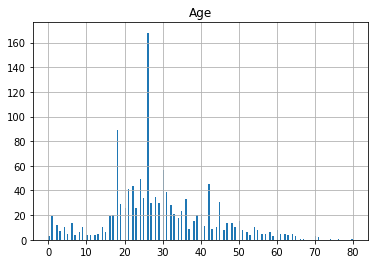

In [680]:
# see if bucketing age groups might make sense
ship.hist('Age',bins = 200)

In [681]:
ship.pivot_table(values = 'Survived',
                 index = ('Sex', 'Age'),
                 columns = 'Pclass')

Pclass       1     2         3
Sex Age                       
0   0.0    NaN   NaN  1.000000
    1.0   1.00  1.00  0.333333
    2.0    NaN  1.00  0.000000
    3.0    NaN  1.00  1.000000
    4.0   1.00   NaN  0.250000
    5.0    NaN   NaN       NaN
    6.0    NaN   NaN  0.600000
    7.0    NaN   NaN  0.000000
    8.0    NaN  1.00  0.000000
    9.0    NaN   NaN  0.500000
    10.0   NaN   NaN  0.000000
    11.0  1.00   NaN  0.000000
    12.0   NaN   NaN  1.000000
    13.0   NaN   NaN       NaN
    14.0   NaN   NaN  0.000000
    15.0   NaN   NaN  0.000000
    16.0   NaN  0.00  0.111111
    17.0  1.00   NaN  0.000000
    18.0  0.00  0.00  0.125000
    19.0  0.00  0.25  0.083333
    20.0   NaN   NaN  0.214286
    21.0  0.00  0.00  0.076923
    22.0  0.00   NaN  0.071429
    23.0  1.00  0.00  0.000000
    24.0  0.00  0.00  0.090909
    25.0  1.00  0.00  0.181818
    26.0  1.00  0.00  0.089109
    27.0  0.75  0.00  0.600000
    28.0  0.50  0.00  0.000000
    29.0  0.00  0.00  0.375000
...        ...   ...       ...
1   34.0   NaN  1.00       NaN
    35.0  1.00  1.00  1.000000
    36.0  1.00  1.00  1.000000
    37.0   NaN   NaN  0.000000
    38.0  1.00  0.00  1.000000
    39.0  1.00   NaN  0.000000
    40.0  1.00  1.00  0.000000
    41.0  1.00  1.00  0.000000
    42.0  1.00  1.00       NaN
    43.0  1.00   NaN  0.000000
    44.0  1.00  0.00       NaN
    45.0  1.00  1.00  0.000000
    47.0  1.00   NaN  0.000000
    48.0  1.00  1.00  0.000000
    49.0  1.00   NaN       NaN
    50.0  0.50  1.00       NaN
    51.0  1.00   NaN       NaN
    52.0  1.00   NaN       NaN
    53.0  1.00   NaN       NaN
    54.0  1.00  1.00       NaN
    55.0   NaN  1.00       NaN
    56.0  1.00   NaN       NaN
    57.0   NaN  0.00       NaN
    58.0  1.00   NaN       NaN
    59.0   NaN   NaN       NaN
    60.0  1.00   NaN       NaN
    62.0  1.00   NaN       NaN
    63.0  1.00   NaN  1.000000
    64.0   NaN   NaN       NaN
    76.0   NaN   NaN       NaN

[136 rows x 3 columns]

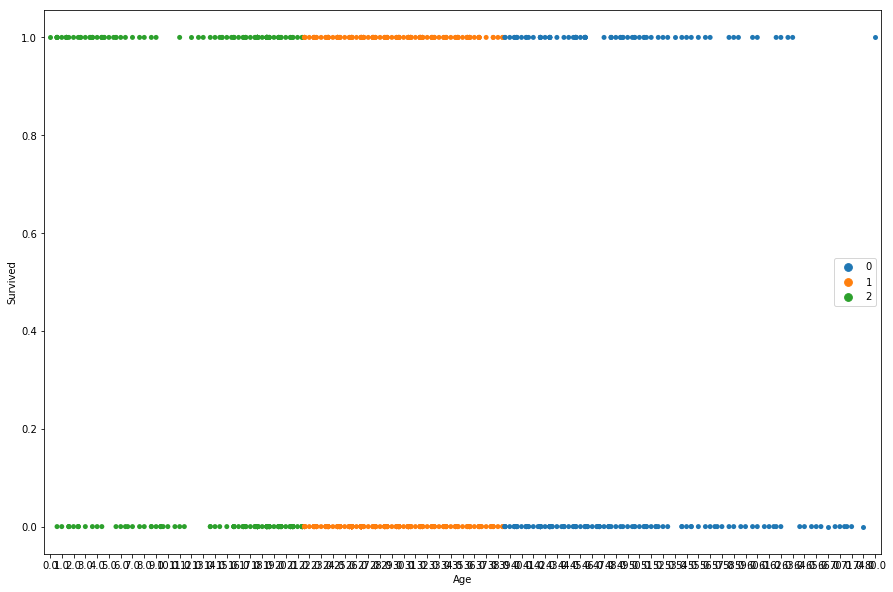

In [682]:
# use K-Means to identify Age - Survived clustering
 
train_age_survived = ship[np.isnan(ship.Survived) == False][['Age', 'Survived']]

import seaborn as sns
from sklearn.cluster import KMeans
K = KMeans(n_clusters = 3).fit(train_age_survived)
plt.figure(figsize = (15,10))

ax = sns.swarmplot(x = "Age", y = "Survived", hue = K.labels_, data = train_age_survived)



In [683]:
# import missing cabin values
ship.Cabin.value_counts(dropna = False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

In [684]:
# create a new df with assigned cabins only
Excludes_U = ship[ship['Cabin'].isna() == False]
# Excludes_U.isnull().sum()

In [685]:
Excludes_U.Cabin.value_counts(dropna=False)

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [686]:
# Cabin: fill NaN values with U for Unknown
ship.Cabin = ship.Cabin.fillna('U')

In [687]:
ship.Ticket.head(5)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [688]:
Excludes_U.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,Family_size,Fmaily
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,Mrs,2,Small_Family
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,Mrs,2,Small_Family
6,54.0,E,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,Mr,1,Single


In [689]:
Excludes_U.Ticket.head(5)
# left is index, right is ticket value 
#Excludes_U.Ticket.loc[3]

1     PC 17599
3       113803
6        17463
10     PP 9549
11      113783
Name: Ticket, dtype: object

In [690]:
Excludes_U.Cabin.head(5)

1     C
3     C
6     E
10    G
11    C
Name: Cabin, dtype: object

In [691]:
ticket = ship.Ticket.loc[3]
ticket

'113803'

In [692]:
(Excludes_U.Ticket == ticket).value_counts()
Excludes_U.Ticket == ticket

1       False
3        True
6       False
10      False
11      False
21      False
23      False
27      False
31      False
52      False
54      False
55      False
61      False
62      False
66      False
75      False
88      False
92      False
96      False
97      False
102     False
110     False
118     False
123     False
124     False
128     False
136     False
137      True
139     False
148     False
        ...  
1192    False
1196    False
1197    False
1199    False
1205    False
1207    False
1212    False
1213    False
1217    False
1222    False
1226    False
1234    False
1241    False
1246    False
1247    False
1255    False
1262    False
1263    False
1265    False
1269    False
1281    False
1282    False
1286    False
1288    False
1291    False
1295    False
1296    False
1298    False
1302    False
1305    False
Name: Ticket, Length: 295, dtype: bool

In [693]:
# use cabin from those on the same ticket
for x in range(len(ship)):
    try:
        if ship.Cabin.loc[x] == 'U':
            ship.Cabin.loc[x] = \
            Excludes_U.Cabin.loc[Excludes_U.Ticket.loc[
                Excludes_U.Ticket == ship.Ticket.loc[x]].index[0]]
    except: continue

        

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [694]:
ship.Cabin.value_counts(dropna=False)

U    998
C    104
B     68
D     46
E     42
F     23
A     22
G      5
T      1
Name: Cabin, dtype: int64

In [695]:
# add Pclass information to Cabin field
ship.Cabin = ship.Cabin + '-' + ship.Pclass.astype(str)

In [696]:
ship.Cabin.value_counts(dropna=False)

U-3    691
U-2    253
C-1    104
B-1     68
U-1     54
D-1     40
E-1     34
A-1     22
F-2     13
F-3     10
D-2      6
E-2      5
G-3      5
E-3      3
T-1      1
Name: Cabin, dtype: int64

In [697]:
# Fare
# identify any 'problem' fares
ship.sort_values('Fare',na_position='first').head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,Family_size,Fmaily
1043,60.0,U-3,S,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,NaN,3701,Mr,1,Single
732,30.0,U-2,S,0.0,"Knight, Mr. Robert J",0,733,2,0,0,0.0,239855,Mr,1,Single
413,30.0,U-2,S,0.0,"Cunningham, Mr. Alfred Fleming",0,414,2,0,0,0.0,239853,Mr,1,Single


In [698]:
print('max fare', ship.Fare.max())
print('min fare', ship.Fare.min())

max fare 512.3292
min fare 0.0


In [699]:
ship[ship.Fare < 7].sort_values('Fare', na_position = 'first')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,Family_size,Fmaily
1263,49.0,B-1,S,0.0000,"Ismay, Mr. Joseph Bruce",0,1264,1,0,0,NaN,112058,Mr,1,Single
822,38.0,U-1,S,0.0000,"Reuchlin, Jonkheer. John George",0,823,1,0,0,0.0,19972,Jonkheer,1,Single
815,42.0,B-1,S,0.0000,"Fry, Mr. Richard",0,816,1,0,0,0.0,112058,Mr,1,Single
806,39.0,A-1,S,0.0000,"Andrews, Mr. Thomas Jr",0,807,1,0,0,0.0,112050,Mr,1,Single
732,30.0,U-2,S,0.0000,"Knight, Mr. Robert J",0,733,2,0,0,0.0,239855,Mr,1,Single
674,30.0,U-2,S,0.0000,"Watson, Mr. Ennis Hastings",0,675,2,0,0,0.0,239856,Mr,1,Single
633,42.0,U-1,S,0.0000,"Parr, Mr. William Henry Marsh",0,634,1,0,0,0.0,112052,Mr,1,Single
597,49.0,U-3,S,0.0000,"Johnson, Mr. Alfred",0,598,3,0,0,0.0,LINE,Mr,1,Single
481,30.0,U-2,S,0.0000,"Frost, Mr. Anthony Wood ""Archie""",0,482,2,0,0,0.0,239854,Mr,1,Single
413,30.0,U-2,S,0.0000,"Cunningham, Mr. Alfred Fleming",0,414,2,0,0,0.0,239853,Mr,1,Single


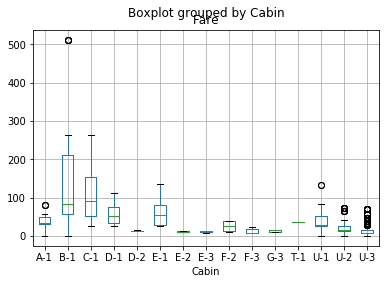

In [700]:
ship.boxplot(column = 'Fare', by='Cabin')

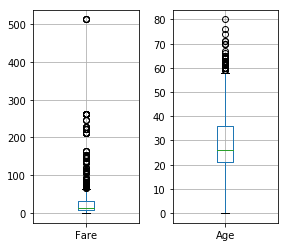

In [701]:
fig = plt.figure(figsize=(6,10))

ax1 = plt.subplot(331)
ax2 = plt.subplot(332)


ship.boxplot(column = 'Fare', ax = ax1)
ship.boxplot(column = 'Age', ax = ax2)

plt.suptitle('')
plt.tight_layout()

In [702]:
# Cabin: change Cabin for Ticket PC 17611 (outlier) from U-1 to B-1 based on price
for i in (334, 660):
    ship.Cabin.loc[i] = "B - 1"


# Fare:  Replace fares below $3 and NaN with the median for their cabin
ship['Fare2'] = ship['Fare']
for i in range(len(ship)):
    try:
        cabin = ship.Cabin[i]     
        if (pd.isnull(ship.Fare2[i]) | (ship.Fare2[i] <= 1)):
            ship.Fare2[i] = ship.Fare[ship.Cabin == cabin].median()

    except:
        continue

        
ship['Fare'] = ship['Fare2']



/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [703]:
# Fare_grp:  create fare groupings
ship['FareGroup'] = ship.Fare.apply(lambda x: "Under $11" if x < 11 
                                              else ("$11 - $50" if x <= 50  else "Over $50")) 

In [704]:
# drop Ticket, Name, Fare2, Sibsp, and Parch columns
ship.drop(['Ticket', 'Name', 'SibSp', 'Parch', 'title', 'Fare2'],
            axis = 1, inplace = True)

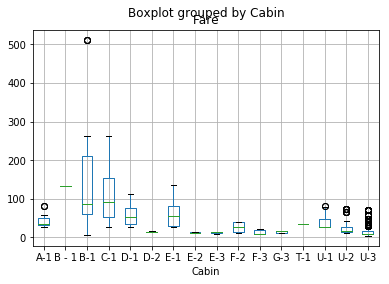

In [705]:
ship.boxplot(column = 'Fare', by = 'Cabin')

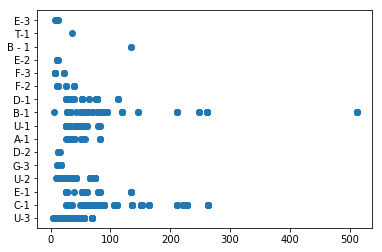

In [706]:
plt.scatter(ship.Fare, ship.Cabin)

In [707]:
ship.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'PassengerId', 'Pclass', 'Sex',
       'Survived', 'Family_size', 'Fmaily', 'FareGroup'],
      dtype='object')

In [708]:
boat = ship.copy()

In [709]:
# Create dummy variables
boat = pd.get_dummies(ship, drop_first=True)

In [710]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
Age                    1309 non-null float64
Fare                   1309 non-null float64
PassengerId            1309 non-null int64
Pclass                 1309 non-null int64
Sex                    1309 non-null int64
Survived               891 non-null float64
Family_size            1309 non-null int64
Cabin_B - 1            1309 non-null uint8
Cabin_B-1              1309 non-null uint8
Cabin_C-1              1309 non-null uint8
Cabin_D-1              1309 non-null uint8
Cabin_D-2              1309 non-null uint8
Cabin_E-1              1309 non-null uint8
Cabin_E-2              1309 non-null uint8
Cabin_E-3              1309 non-null uint8
Cabin_F-2              1309 non-null uint8
Cabin_F-3              1309 non-null uint8
Cabin_G-3              1309 non-null uint8
Cabin_T-1              1309 non-null uint8
Cabin_U-1              1309 non-null uint8
Cabin_U-2              1309 

In [711]:
# AFter all the fields are numicial, the dataset is ready for modeling 

In [712]:
# re-create train and test df's for modeling 
train_dt = boat[:train_index]
test_dt = boat[train_index:]
#train_dt.columns

In [713]:
boat.corr()['Survived'].sort_values(ascending = False)

Survived               1.000000
Sex                    0.543351
FareGroup_Over $50     0.280138
Fmaily_Small_Family    0.279855
Fare                   0.251155
Cabin_B-1              0.179663
Cabin_D-1              0.141352
Cabin_C-1              0.133746
Cabin_E-1              0.117446
Cabin_F-2              0.096132
Cabin_E-3              0.073642
Cabin_B - 1            0.060095
Cabin_U-2              0.058539
Cabin_D-2              0.050561
Cabin_E-2              0.033391
Family_size            0.016639
Cabin_G-3              0.016040
Embarked_Q             0.003650
PassengerId           -0.005007
Cabin_F-3             -0.008551
Cabin_U-1             -0.014713
Cabin_T-1             -0.026456
Age                   -0.059283
Embarked_S            -0.149683
Fmaily_Single         -0.203367
FareGroup_Under $11   -0.280724
Cabin_U-3             -0.330782
Pclass                -0.338481
Name: Survived, dtype: float64

In [714]:
# modeling

In [715]:
X = train_dt.copy()
y = train_dt.copy()
# X.drop(['Survived'], axis = 1, inplace = True)
# y = train_dt['Survived']

In [716]:
X.head(3)
X.columns
y.head(3)

,Age,Fare,PassengerId,Pclass,Sex,Survived,Family_size,Cabin_B - 1,Cabin_B-1,Cabin_C-1,...,Cabin_T-1,Cabin_U-1,Cabin_U-2,Cabin_U-3,Embarked_Q,Embarked_S,Fmaily_Single,Fmaily_Small_Family,FareGroup_Over $50,FareGroup_Under $11
0,22.0,7.2500,1,3,0,0.0,2,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1,38.0,71.2833,2,1,1,1.0,2,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,26.0,7.9250,3,3,1,1.0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [717]:
from sklearn.cross_validation import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.25, random_state=10)

In [718]:
print(X_train.columns)
print(X.columns)

Index(['Age', 'Fare', 'PassengerId', 'Pclass', 'Sex', 'Survived',
       'Family_size', 'Cabin_B - 1', 'Cabin_B-1', 'Cabin_C-1', 'Cabin_D-1',
       'Cabin_D-2', 'Cabin_E-1', 'Cabin_E-2', 'Cabin_E-3', 'Cabin_F-2',
       'Cabin_F-3', 'Cabin_G-3', 'Cabin_T-1', 'Cabin_U-1', 'Cabin_U-2',
       'Cabin_U-3', 'Embarked_Q', 'Embarked_S', 'Fmaily_Single',
       'Fmaily_Small_Family', 'FareGroup_Over $50', 'FareGroup_Under $11'],
      dtype='object')
Index(['Age', 'Fare', 'PassengerId', 'Pclass', 'Sex', 'Survived',
       'Family_size', 'Cabin_B - 1', 'Cabin_B-1', 'Cabin_C-1', 'Cabin_D-1',
       'Cabin_D-2', 'Cabin_E-1', 'Cabin_E-2', 'Cabin_E-3', 'Cabin_F-2',
       'Cabin_F-3', 'Cabin_G-3', 'Cabin_T-1', 'Cabin_U-1', 'Cabin_U-2',
       'Cabin_U-3', 'Embarked_Q', 'Embarked_S', 'Fmaily_Single',
       'Fmaily_Small_Family', 'FareGroup_Over $50', 'FareGroup_Under $11'],
      dtype='object')


In [719]:
# Model
#1 Import binary algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


gbc = GradientBoostingClassifier()
r = RandomForestClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()

In [720]:
#2 Set test model parameters
algorithms = [g, b, k, log, d, r, gbc]
names = ['GuassianNB', 'Bernoulli NB', 'K-Nearest', 'Logistic',
         'Decision Tree', 'Random Forest', 'Gradient Boosting']

dropped_cols = ['Survived', 'PassengerId', 'Age', 'Pclass'] 
Dependent = ['Survived']

In [721]:
# the function to train all the assigned binary models
def assessBiAlgorithms(X_train, y_train, X_test, y_test, algorithms):
    
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X_train, y_train)

    # Create empty lists to place training metrics inside
    accuracy_train = []
    precision_train = []
    recall_train = []
    f1_train = []
    
    # Create empty lists to place testing metrics inside
    accuracy_test =[]
    precision_test = []
    recall_test = []
    f1_test = []

    # Loop through all of the possibilities of the fitted algorithms and append scores
    for alg in algorithms:

        accuracy_train.append(accuracy_score(y_train, alg.predict(X_train)))
        precision_train.append(precision_score(y_train, alg.predict(X_train)))
        recall_train.append(recall_score(y_train,alg.predict(X_train)))
        f1_train.append(f1_score(y_train, alg.predict(X_train)))
        
        #run model against test data
        accuracy_test.append(accuracy_score(y_test, alg.predict(X_test)))
        precision_test.append(precision_score(y_test, alg.predict(X_test)))
        recall_test.append(recall_score(y_test,alg.predict(X_test)))
        f1_test.append(f1_score(y_test, alg.predict(X_test)))
        

    # Create a dataframe and replace all the values with the metrics lists
    metrics = pd.DataFrame(columns = ['Train_Accuracy',
                                      'Train_Precision',
                                      'Train_Recall',
                                      'Train_F1', 
                                      'Test_Accuracy', 
                                      'Test_Precision', 
                                      'Test_Recall', 
                                      'Test_F1'], index = names)
    metrics['Train_Accuracy'] = accuracy_train
    metrics['Train_Precision'] = precision_train
    metrics['Train_Recall'] = recall_train
    metrics['Train_F1'] = f1_train
    
    metrics['Test_Accuracy'] = accuracy_test
    metrics['Test_Precision'] = precision_test
    metrics['Test_Recall'] = recall_test
    metrics['Test_F1'] = f1_test
        
    return metrics.sort_values('Test_Accuracy', ascending = False)

In [722]:
X_train.columns

Index(['Age', 'Fare', 'PassengerId', 'Pclass', 'Sex', 'Survived',
       'Family_size', 'Cabin_B - 1', 'Cabin_B-1', 'Cabin_C-1', 'Cabin_D-1',
       'Cabin_D-2', 'Cabin_E-1', 'Cabin_E-2', 'Cabin_E-3', 'Cabin_F-2',
       'Cabin_F-3', 'Cabin_G-3', 'Cabin_T-1', 'Cabin_U-1', 'Cabin_U-2',
       'Cabin_U-3', 'Embarked_Q', 'Embarked_S', 'Fmaily_Single',
       'Fmaily_Small_Family', 'FareGroup_Over $50', 'FareGroup_Under $11'],
      dtype='object')

X_train = X_train.drop(columns=dropped_cols)
y_train = y_train[Dependent]

X_test = X_test.drop(columns=dropped_cols)
y_test = y_test[Dependent]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [723]:
# train each of the binary models and assess their results
X_train = X_train.drop(columns=dropped_cols)
y_train = y_train[Dependent]

X_test = X_test.drop(columns=dropped_cols)
y_test = y_test[Dependent]



results = assessBiAlgorithms(X_train, y_train, X_test, y_test, algorithms)
results

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
Logistic,0.808383,0.778226,0.725564,0.750973,0.807175,0.732394,0.684211,0.707483
Random Forest,0.917665,0.934156,0.853383,0.891945,0.807175,0.739130,0.671053,0.703448
Gradient Boosting,0.866766,0.911628,0.736842,0.814969,0.798206,0.754098,0.605263,0.671533
Bernoulli NB,0.741018,0.691358,0.631579,0.660118,0.793722,0.702703,0.684211,0.693333
Decision Tree,0.934132,0.958678,0.872180,0.913386,0.789238,0.683544,0.710526,0.696774
K-Nearest,0.826347,0.777778,0.789474,0.783582,0.775785,0.666667,0.684211,0.675325
GuassianNB,0.690120,0.752137,0.330827,0.459530,0.753363,0.783784,0.381579,0.513274


## train models on entire train population

In [724]:
#  train all the assigned binary models
def pedictResults(X_train_dt, y_train_dt, X_predict_dt, algorithm):
    
    alg = algorithm.fit(X_train_dt, y_train_dt)
    y_predict_train = alg.predict(X_train_dt)

#    for i in range(len(algorithms)):
#        algorithms[i] = algorithms[i].fit(X, y)


 #   # Loop through all of the possibilities of the fitted algorithms and append scores
 #   for alg in algorithms:
    y_predict = alg.predict(X_predict_dt)

    return y_predict

In [725]:
#Set Predict parameters and predict results
algorithm = gbc
name = 'Gradient Boosting'

X_train_dt = train_dt.drop(columns=dropped_cols)
y_train_dt = train_dt[Dependent]

X_predict_dt = test_dt.drop(columns=dropped_cols)

test_dt[Dependent] = pedictResults(X_train_dt, y_train_dt, X_predict_dt, algorithm)
# pedictResults(X_train_dt, y_train_dt, X_predict_dt, algorithm)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj

In [726]:
test_dt.columns

Index(['Age', 'Fare', 'PassengerId', 'Pclass', 'Sex', 'Survived',
       'Family_size', 'Cabin_B - 1', 'Cabin_B-1', 'Cabin_C-1', 'Cabin_D-1',
       'Cabin_D-2', 'Cabin_E-1', 'Cabin_E-2', 'Cabin_E-3', 'Cabin_F-2',
       'Cabin_F-3', 'Cabin_G-3', 'Cabin_T-1', 'Cabin_U-1', 'Cabin_U-2',
       'Cabin_U-3', 'Embarked_Q', 'Embarked_S', 'Fmaily_Single',
       'Fmaily_Small_Family', 'FareGroup_Over $50', 'FareGroup_Under $11'],
      dtype='object')

In [727]:
Results = pd.DataFrame(columns = ['PassengerId', 'Survived'])
Results['PassengerId'] = test_dt['PassengerId']

In [728]:
Results['Survived'] = test_dt['Survived']

In [742]:
sum(Results['Survived'])

130.0

In [729]:
Results.head()

,PassengerId,Survived
891,892,0.0
892,893,1.0
893,894,0.0
894,895,0.0
895,896,0.0


In [730]:
Results.to_csv('Titanic_00.csv', index=False)